## Phase 1 Project

Please fill out:
* Student name: Kai Cansler
* Student pace: self paced
* Instructor name: Mark Barbour

# Movie Analysis for Microsoft Studios


## Overview
In the growing landscape of original video content and streaming it is our new project to start our own movie studio. It is important to understand what movies perform well and how they perform. This will give us the overview in understanding our entry into this market.

## Business Problem
We will be exploring what types of films perform the best at the box office to see which genres perform with the best return on investment. A analysis of what movies perform best with certain demographics will help us understand what audience we would like to target for our new film creations. We will use these findings to create a business strategy that will help Microsoft Studios flourish.

## Data
The MovieDB and IMDB datasets to complete our exploratory data analysis. These two datasets will provide a comprehensive picture on what movies perform and which genre they are along with the ratings these movies earned.

## Method
This project uses descriptive analysis, including group by commands to understand how genres as a whole affects return on investment and net profit. We will also use these techniques to look at what month would be the best to release a movie in terms of generating highest net profit. Lastly we will look at how budget and runtime affect the net profit of a movie.

## Data Preparation

In [1]:
# Import Tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

# Load the Data
import gzip
from zipfile import ZipFile

# Make our dataframes easier to read
pd.options.display.float_format = '{:.2f}%'.format

In [2]:
# Load data pathways
f1 = '/Users/kaicansler/Documents/Flatiron/dsc-data-science-env-config/phase_1/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz'
f2 = '/Users/kaicansler/Documents/Flatiron/dsc-data-science-env-config/phase_1/dsc-phase-1-project-v2-4/zippedData/im.db.zip'
ex_f2 = '/Users/kaicansler/Documents/Flatiron/dsc-data-science-env-config/phase_1/dsc-phase-1-project-v2-4/zippedData/im.db'
f3 = '/Users/kaicansler/Documents/Flatiron/dsc-data-science-env-config/phase_1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz'
f4 = '/Users/kaicansler/Documents/Flatiron/dsc-data-science-env-config/phase_1/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz'

# Create a connection to imdb
conn = sqlite3.connect(ex_f2)

# Select All from Movie Basics
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
#movie_basics.head()

# Explore data from Movie Ratings Table by Selecting all fields
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
#movie_ratings.head()

# Read Data from Box office Mojo
bom_df = pd.read_csv(f1)

# Read in movie budget data from The Numbers 
movie_budgets_df = pd.read_csv(f3)
# movie_budgets_df.head()

# Read Data from The Movie Databases
tmdb_df = pd.read_csv(f4)
# Preview The Movie Database Movies Dataframe


In [3]:
# Understand our datasets
print(movie_basics.info())
print(movie_ratings.info())
print(bom_df.info())
print(tmdb_df.info())
print(movie_budgets_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33

Looking at the info on each of our datasets we can see that bom_df and movie_basics has missing values.
movie_basics contain the most with runtime_minutes and genres having significat missing values and original_title
with a smaller amount.

In [4]:
# print number of NA values in runtime_minutes and genres
print("Number of NA values in runtime_minutes is", len(movie_basics[movie_basics.runtime_minutes.isna()]))
print("Number of NA values in genres is", len(movie_basics[movie_basics.genres.isna()]))

Number of NA values in runtime_minutes is 31739
Number of NA values in genres is 5408


The missing values in original_title is so small we can remove those rows without it affecting our results. For the runtime_minutes, there are many missing values so we can fill the values with the mean to not lose any insight on our results. Lastly, genres column contains categorical data so we will fill the missing values with 'Missing' since the missing values could be insightful.

In [5]:
# Dropping rows with missing values in original_title
movie_basics.dropna(subset =["original_title"], inplace = True)

# Fill rows with missing values in runtime_minutes with the mean
movie_basics["runtime_minutes"].fillna(movie_basics["runtime_minutes"].median(), inplace = True)

# Fill rows with missing values in genre with "Missing"
movie_basics["genres"].fillna("Missing", inplace = True)

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00%,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00%,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00%,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.00%,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00%,"Comedy,Drama,Fantasy"


Now that we have addressed those missing values lets take a look at our data. We see that the genres column contains multiple categorical inputs. We are looking to see what genres earn the most and so we will need to split it into multiple rows to make it easier to do our analysis.

In [6]:
# Split the genres into a list type and then split the list type into multiple rows.
movie_basics["genre_list"] = movie_basics["genres"].str.split(",")
split_mb = movie_basics.explode("genre_list")

In [7]:
split_mb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.00%,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.00%,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.00%,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00%,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00%,"Biography,Drama",Drama


Now that the genre list is split in multiple rows we can now aggregate the gross earnings to see which movies earn the most.

In [8]:
# Take a look at budgets dataset
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


We see that release_date is not a datetime object. Changing it datetime will make it easier to do any time series analysis. We also want to change the production budget, domestic and worldwide gross into a integer data type instead of a string.

In [9]:
#movie_budgets.head()
# Change release_date to datetime dtype
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df['release_year'] = movie_budgets_df['release_date'].dt.year
movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.month

# Change worldwide_gross to integer
movie_budgets_df = movie_budgets_df.replace({"\$":""}, regex = True)
movie_budgets_df = movie_budgets_df.replace({"\,":""}, regex = True)
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget'])
movie_budgets_df['domestic_gross'] = pd.to_numeric(movie_budgets_df['domestic_gross'])
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'])
# Create profit column
movie_budgets_df['net_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
# Use profit column to find Return on Investment
movie_budgets_df['roi'] = (movie_budgets_df['net_profit'] / movie_budgets_df['production_budget']) * 100

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,net_profit,roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,2351345279,553.26%
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,635063875,154.67%
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,-200237650,-57.21%
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,1072413963,324.38%
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,999721747,315.37%


We want to look at when the best time to release a movie is so we will create an aggregate dataset grouped by the month of the year.

After we want to create out final dataset containing all the columns we will need for our analysis.

In [10]:
# We join the two datasets together to contain all the information we want.
movie_df = pd.merge(left=movie_budgets_df, right=movie_basics, left_on=["movie", "release_year"], right_on=["primary_title", "start_year"], how="inner")
#movie_df.head()
# Finally we save all the columns we want.
movie_df = movie_df[[
    'movie', 'release_date', 'release_year', 'release_month', 'production_budget',
    'worldwide_gross', 'net_profit', 'roi', 'runtime_minutes', 'genre_list'
                    ]]

In [11]:
print(len(movie_df))
movie_df.head()

1532


,movie,release_date,release_year,release_month,production_budget,worldwide_gross,net_profit,roi,runtime_minutes,genre_list
0,Pirates of the Caribbean: On Stranger Tides,2011-05-20,2011,5,410600000,1045663875,635063875,154.67%,136.00%,"[Action, Adventure, Fantasy]"
1,Dark Phoenix,2019-06-07,2019,6,350000000,149762350,-200237650,-57.21%,113.00%,"[Action, Adventure, Sci-Fi]"
2,Avengers: Age of Ultron,2015-05-01,2015,5,330600000,1403013963,1072413963,324.38%,141.00%,"[Action, Adventure, Sci-Fi]"
3,Avengers: Infinity War,2018-04-27,2018,4,300000000,2048134200,1748134200,582.71%,149.00%,"[Action, Adventure, Sci-Fi]"
4,Justice League,2017-11-17,2017,11,300000000,655945209,355945209,118.65%,120.00%,"[Action, Adventure, Fantasy]"


## Analysis

### Question 1: What genre earns the most?

In [12]:
# Set the style for our plots
plt.style.use('ggplot')

# Explode our genre column in movie_df
exploded_movie_df = movie_df.explode('genre_list')
genre_grouped = exploded_movie_df.groupby('genre_list')['roi'].mean()
genre_roi_df = genre_grouped.to_frame(name = 'roi').reset_index()

genre_roi_df = genre_roi_df.sort_values('roi', ascending=False)
genre_roi_df.head()

,genre_list,roi
15,Mystery,855.70%
11,Horror,771.93%
20,Thriller,515.17%
12,Missing,295.33%
2,Animation,263.84%


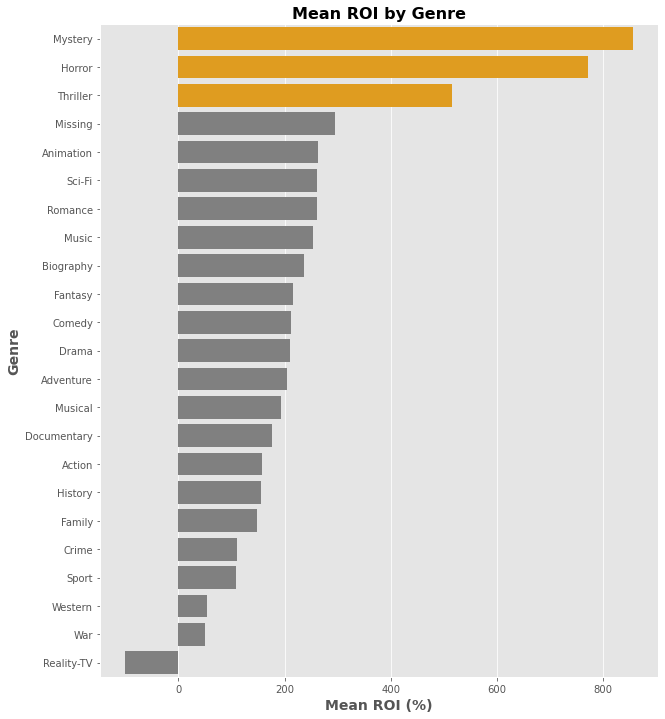

In [13]:
labels = np.array(genre_roi_df['genre_list'])
values = np.array(genre_roi_df['roi'])
c = ['grey' if x < values[2] else 'orange' for x in values]

# Set up plot figure size
plt.figure(figsize =(10,12))
ax = sns.barplot(y = labels, x = values, palette = c)
ax.set_title("Mean ROI by Genre", weight = 'bold').set_fontsize('16')
ax.set_ylabel("Genre", fontsize = '14', weight = 'bold')
ax.set_xlabel("Mean ROI (%)", fontsize = '14', weight = 'bold');

### ROI vs Net Profit
We can see that the top 3 genres with the highest ROI are Mystery, Horror, and Thrillers. Below we see the Highest Net Profit is Animation, Adventure, and Sci-Fi which have a significantly higher Net Profit than Mystery, Horror, and Thriller. This tells us that the most profitable as long as the budget allows would be to create a movie under the Animation, Adventure, or Sci-Fi genres. If budgets are low focusing on creating Mystery, Horror, and Thrillers have the highest ROI and could be a way to increase our cashflows and provide bigger budgets for our higher earning projects.

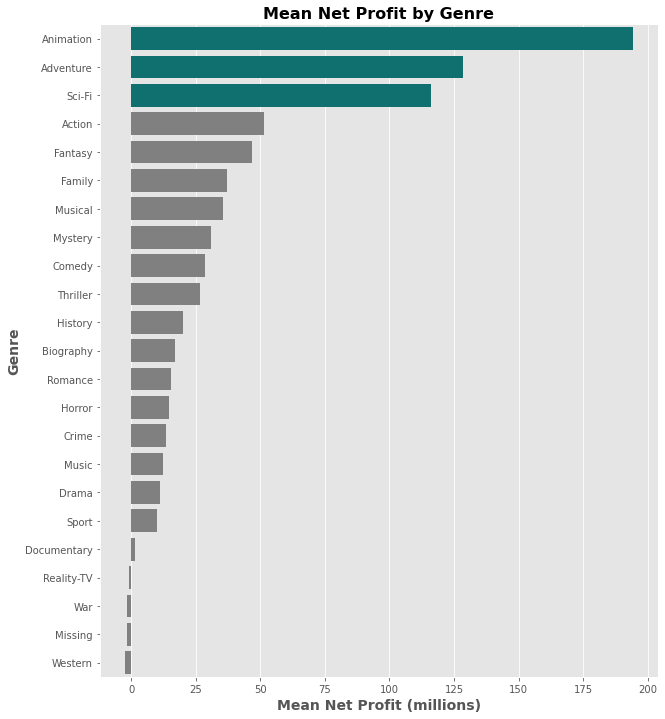

In [14]:
genre_grouped = exploded_movie_df.groupby('genre_list')['net_profit'].median()
genre_profit_df = genre_grouped.to_frame(name = 'net_profit').reset_index()

genre_profit_df = genre_profit_df.sort_values('net_profit', ascending=False)

labels = np.array(genre_profit_df['genre_list'])
values = np.array(genre_profit_df['net_profit'])/1000000
c = ['grey' if x < values[2] else 'teal' for x in values]

# Set up plot figure size
plt.figure(figsize =(10,12))
ax = sns.barplot(y = labels, x = values, palette = c)
ax.set_title("Mean Net Profit by Genre", weight = 'bold').set_fontsize('16')
ax.set_ylabel("Genre", fontsize = '14', weight = 'bold')
ax.set_xlabel("Mean Net Profit (millions)", fontsize = '14', weight = 'bold');

### Question 2: When is the best time to release a movie?

Now that we understand what type of movie we want to create its important to understand what other factors could lead to the net profit of a movie. It is vital to consider when exactly the best time to release a movie is? 

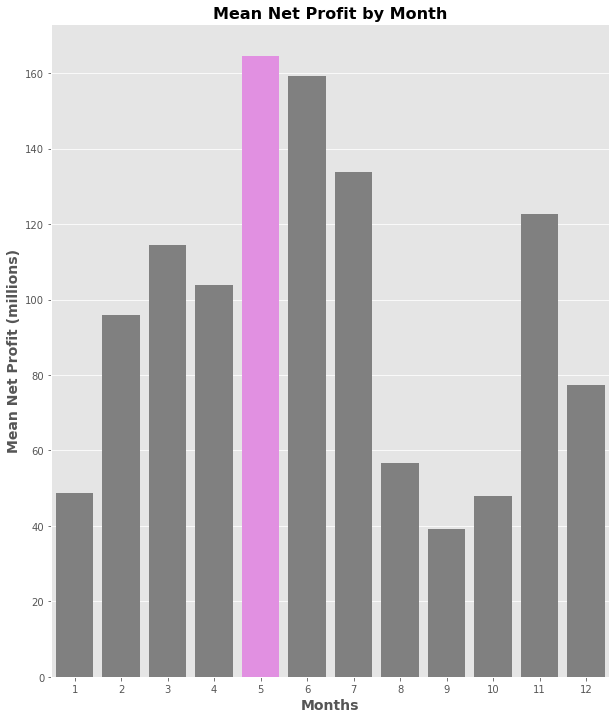

In [15]:
monthly_df = movie_df.groupby('release_month')['net_profit'].mean()
monthly_profit_df = monthly_df.to_frame(name = 'net_profit').reset_index()

monthly_profit_df = monthly_profit_df.sort_values('release_month')
sorted_df = monthly_profit_df.sort_values('net_profit')

labels = monthly_profit_df['release_month']
values = monthly_profit_df['net_profit'] / 1000000
c = ['grey' if (x != max(values)) else 'violet' for x in values]
# Set up plot figure size
plt.figure(figsize =(10,12))
ax = sns.barplot(y = values, x = labels, orient='v', palette = c)
ax.set_title("Mean Net Profit by Month", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Months", fontsize = '14', weight = 'bold')
ax.set_ylabel("Mean Net Profit (millions)", fontsize = '14', weight = 'bold');

### Best time to release a movie
It is quite understandable and expected that releases in the summer and winter months have higher Net Profit than the other months. This is because school breaks, holidays, and vacations are during these times. With more leisure time we are expecting more people to go to the movies. The release of a movie is important to a movies success with popularity and wide-spread reception through word of mouth. The highest impact we can have on our project with release will be to publish it when we have the highest opportunity that the most amount of people will watch it.

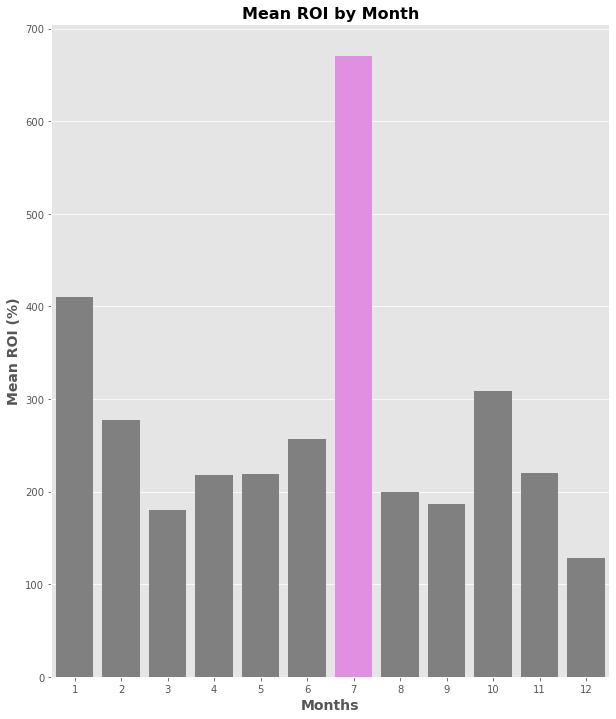

In [16]:
monthly_roi_df = movie_df.groupby('release_month')['roi'].mean()
monthly_roi_df = monthly_roi_df.to_frame(name = 'roi').reset_index()

monthly_roi_df = monthly_roi_df.sort_values('release_month')
sorted_df = monthly_roi_df.sort_values('roi')

labels = monthly_roi_df['release_month']
values = monthly_roi_df['roi']
c = ['grey' if (x != max(values)) else 'violet' for x in values]
# Set up plot figure size
plt.figure(figsize =(10,12))
ax = sns.barplot(y = values, x = labels, orient='v', palette = c)
ax.set_title("Mean ROI by Month", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Months", fontsize = '14', weight = 'bold')
ax.set_ylabel("Mean ROI (%)", fontsize = '14', weight = 'bold');

The movies with the highest Return on Investment are released in July. For our projects with lower budgets with the aim for a higher ROI such as Horror, Thriller, and Mystery are best released during the month of July. This is most likely in preperation for the Autumn months before Halloween when these movies are more popular to audiences.

### Question 3: What is the relationship between runtime minutes and budget on net profit?
We want to see how the runtime of a movie and its productikon budget have an effect on net profit of a movie. We expect to see that runtime and net profit will have a positive correlation. To get a good idea we will also range the sizes based on the values of net profit. We 

In [17]:
# Organize values of columns to be more legible
movie_df['runtime_minutes'] = movie_df['runtime_minutes'].astype(int)
movie_df['production_budget'] = movie_df['production_budget']/1000000

In [18]:
movie_top_50 = movie_df.sort_values('net_profit', ascending=False).head(50)
# Average Prod Budget of top 50 movies
print(movie_top_50['production_budget'].mean())
# Average Runtime Minutes of top 50 movies
print(movie_top_50['runtime_minutes'].mean())

174.764
125.98


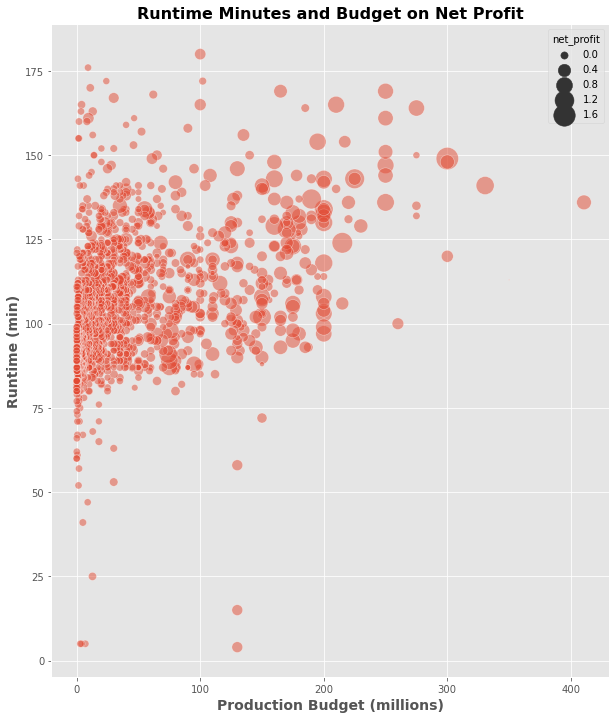

In [19]:
### Set up plot figure size
plt.figure(figsize =(10,12))

# Creating scatterplot
ax = sns.scatterplot(data=movie_df, y ='runtime_minutes', x ='production_budget', size='net_profit', sizes=(1, 500), alpha=.5, palette="muted")
ax.set_title("Runtime Minutes and Budget on Net Profit", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Production Budget (millions)", fontsize = '14', weight = 'bold')
ax.set_ylabel("Runtime (min)", fontsize = '14', weight = 'bold');

As we expected the we can see that the longer the runtime the higher the budget and as the points trend towards positively so does the size as net profit. Of course a longer running movie will have higher costs in production budget but we see a higher net profit as well. This gives us insight that a feature length film will be a great option to choose to create a movie of high quality that will earn higher net profit.

## Conclusion
From our exploratory data analysis we have found some valuable insights from our movie datasets. 

Our first question was which movie genres offer best ROI and Net Profit. We found that Mystery, Horror, and Thriller offer the highest ROI out of the other genres ranging from 500% to even 850%! After taking a look at genres and Net Profit we found that the genres with highest Net Profit are Animation,  Adventure, and Sci-Fi movies. The visualization also shows our Highest ROI genres dont make nearly as close as the highest Net Profit. My recommendation is that with lower budgets we should focus on producing Myster, Horror, and Thriller films to generate the highest return on investment. This could offer us the cashflow and capital to invest into production budgets for films such as Animation, Adventure, and Sci-Fi who bring in much larger Net Profit but are significantly more costly to make. By utilizing these two focuses we can effectively use our capital for projects that will be beneficial for the success of our studio.

The second question was what month would be the best time to release our new projects. A movies release will be a important factor in its success. With the costs of advertising we want to ensure that we time everything to maximize the most value we can get from it. This means that releasing movies in times when we have the highest amount of viewership will be beneficial in spreading our film through word of mouth and ensuring our movie stays popular. We found through our analysis that movies released in the Summer and Winter months have had the most success in Net Profit. Movies released in July had by far the best success in terms of Net Profit. This could be seen from a multitude of factors such as summer being a popular time for employees to take vacation and school is also closed for summer vacation. To make sure we drive as many people as possible through advertisement of our movie we should schedule the production to be released in July.

The last question was how budget and runtime minutes of a movie will affect the Net Profit of a movie. This will inform us on how to strategize how long we should make our production and how large we should make our production budgets. The average runtime minutes for the top 50 movies is 125.98 minutes and the average production budget is $174.764 million. For our large movie projects aiming for high net profit the investment should be at least 174.764 million dollars with a runtime of at least 125.98 minutes. This will give us the best opportunity to earn a high net profit for our film.